In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-15 22:04:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   151MB/s    in 0.7s    

2023-07-15 22:04:38 (151 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/test

pizza  steak


In [4]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [5]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
# Another way to fid out how many images
print(os.listdir('pizza_steak/test/steak'))

['3842125.jpg', '928920.jpg', '144370.jpg', '459522.jpg', '1872368.jpg', '3013404.jpg', '60819.jpg', '1653815.jpg', '148595.jpg', '2475366.jpg', '3137334.jpg', '1206166.jpg', '2943601.jpg', '1225389.jpg', '2802460.jpg', '2600656.jpg', '3293212.jpg', '3576324.jpg', '673127.jpg', '7056.jpg', '1972463.jpg', '1118585.jpg', '1655387.jpg', '3048920.jpg', '2229090.jpg', '2738323.jpg', '2843725.jpg', '284097.jpg', '912108.jpg', '2821155.jpg', '2484823.jpg', '552171.jpg', '787462.jpg', '867610.jpg', '3173402.jpg', '1064847.jpg', '526186.jpg', '902211.jpg', '3343970.jpg', '321090.jpg', '3062369.jpg', '138754.jpg', '27415.jpg', '906508.jpg', '1375503.jpg', '1166047.jpg', '90930.jpg', '3753767.jpg', '2921355.jpg', '281731.jpg', '48208.jpg', '1288129.jpg', '429304.jpg', '1499273.jpg', '2315011.jpg', '324862.jpg', '2756200.jpg', '347745.jpg', '2814314.jpg', '1792128.jpg', '3497585.jpg', '367422.jpg', '2193535.jpg', '2071320.jpg', '3293650.jpg', '1778186.jpg', '3029602.jpg', '1274725.jpg', '2061929.j

In [7]:
num_imgs_test_steak = len(os.listdir('pizza_steak/test/steak'))

In [8]:
num_imgs_test_steak

250

In [9]:
# get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/') #turn our training path into python path
data_dir
class_names = np.array([item.name for item in data_dir.glob('*')])
class_names

array(['steak', 'pizza'], dtype='<U5')

In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup target dir
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  # read and plot
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 512, 3)


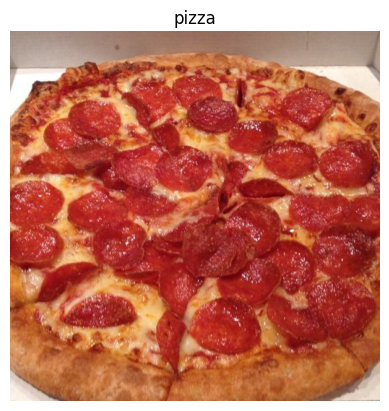

In [11]:
img = view_random_image('pizza_steak/train/', 'pizza')

In [12]:
img

array([[[160, 142, 130],
        [160, 142, 130],
        [159, 141, 129],
        ...,
        [147, 125, 112],
        [135, 113, 100],
        [133, 111,  98]],

       [[160, 142, 130],
        [160, 142, 130],
        [159, 141, 129],
        ...,
        [146, 124, 111],
        [135, 113, 100],
        [134, 112,  99]],

       [[161, 143, 131],
        [161, 143, 131],
        [160, 142, 130],
        ...,
        [143, 121, 108],
        [133, 111,  98],
        [135, 113, 100]],

       ...,

       [[253, 243, 233],
        [252, 242, 232],
        [252, 242, 232],
        ...,
        [238, 221, 211],
        [236, 219, 209],
        [232, 218, 207]],

       [[247, 237, 227],
        [249, 239, 229],
        [251, 241, 231],
        ...,
        [217, 200, 190],
        [217, 200, 190],
        [214, 200, 189]],

       [[235, 225, 215],
        [240, 230, 220],
        [245, 235, 225],
        ...,
        [171, 154, 144],
        [172, 155, 145],
        [169, 155, 144]]

In [13]:
img_n = img / 255.0

In [14]:
img_n

array([[[0.62745098, 0.55686275, 0.50980392],
        [0.62745098, 0.55686275, 0.50980392],
        [0.62352941, 0.55294118, 0.50588235],
        ...,
        [0.57647059, 0.49019608, 0.43921569],
        [0.52941176, 0.44313725, 0.39215686],
        [0.52156863, 0.43529412, 0.38431373]],

       [[0.62745098, 0.55686275, 0.50980392],
        [0.62745098, 0.55686275, 0.50980392],
        [0.62352941, 0.55294118, 0.50588235],
        ...,
        [0.57254902, 0.48627451, 0.43529412],
        [0.52941176, 0.44313725, 0.39215686],
        [0.5254902 , 0.43921569, 0.38823529]],

       [[0.63137255, 0.56078431, 0.51372549],
        [0.63137255, 0.56078431, 0.51372549],
        [0.62745098, 0.55686275, 0.50980392],
        ...,
        [0.56078431, 0.4745098 , 0.42352941],
        [0.52156863, 0.43529412, 0.38431373],
        [0.52941176, 0.44313725, 0.39215686]],

       ...,

       [[0.99215686, 0.95294118, 0.91372549],
        [0.98823529, 0.94901961, 0.90980392],
        [0.98823529, 0

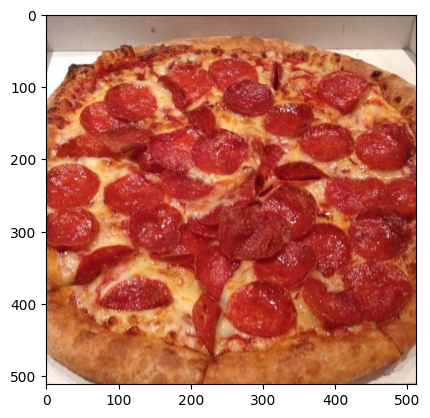

In [15]:
plt.imshow(img_n)

In [16]:
img_n.shape

(512, 512, 3)

Create a CNN model

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Setup the train and test dir
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# model_1
# Set the seed
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation='relu',
                            input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # steps for epoch for batch size
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 258ms/step - loss: 0.5928 - accuracy: 0.6753 - val_loss: 0.4407 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4538 - accuracy: 0.8033 - val_loss: 0.3789 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4236 - accuracy: 0.8173 - val_loss: 0.3733 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3618 - accuracy: 0.8473 - val_loss: 0.3340 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.2933 - accuracy: 0.8893 - val_loss: 0.3229 - val_accuracy: 0.8760


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Non CNN model to compare

In [ ]:
# set the seed
tf.random.set_seed(42)
# model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 230ms/step - loss: 0.9511 - accuracy: 0.4820 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 224ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# increase complexity of model_2
tf.random.set_seed(42)
# model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

# Compile
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 268ms/step - loss: 2.8640 - accuracy: 0.6327 - val_loss: 0.5043 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 12s 267ms/step - loss: 0.7496 - accuracy: 0.7147 - val_loss: 0.4688 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 12s 264ms/step - loss: 0.6174 - accuracy: 0.7333 - val_loss: 0.4274 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5254 - accuracy: 0.7740 - val_loss: 0.5554 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.5454 - accuracy: 0.7687 - val_loss: 0.4272 - val_accuracy: 0.8000


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Too much param than model_1

Binary Classification

Image shape: (364, 512, 3)
Image shape: (388, 512, 3)


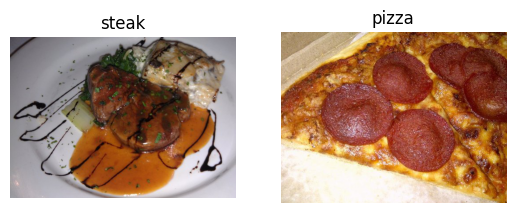

In [ ]:
 # Visualize Data
 plt.figure()
 plt.subplot(1, 2, 1)
 steak_img = view_random_image('pizza_steak/train/', 'steak')
 plt.subplot(1, 2, 2)
 pizza_img = view_random_image('pizza_steak/train/', 'pizza')



In [18]:
# define directories
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [20]:
# turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32

)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# get a sample of the training data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [22]:
images[0], images[0].shape

(array([[[0.16470589, 0.16078432, 0.14509805],
         [0.16470589, 0.16078432, 0.14509805],
         [0.16470589, 0.14901961, 0.13725491],
         ...,
         [0.08627451, 0.07843138, 0.09803922],
         [0.09803922, 0.09019608, 0.10980393],
         [0.09411766, 0.08627451, 0.10588236]],
 
        [[0.18039216, 0.15294118, 0.12941177],
         [0.18823531, 0.16078432, 0.13725491],
         [0.1764706 , 0.14509805, 0.13333334],
         ...,
         [0.07450981, 0.06666667, 0.08627451],
         [0.08627451, 0.07843138, 0.09803922],
         [0.08235294, 0.07450981, 0.09411766]],
 
        [[0.16470589, 0.12941177, 0.10980393],
         [0.19215688, 0.15686275, 0.13725491],
         [0.17254902, 0.13725491, 0.11764707],
         ...,
         [0.08235294, 0.07450981, 0.09411766],
         [0.09019608, 0.08235294, 0.10196079],
         [0.09411766, 0.08627451, 0.10588236]],
 
        ...,
 
        [[0.12941177, 0.1137255 , 0.10980393],
         [0.11764707, 0.10196079, 0.09803

In [23]:
labels

array([0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [45]:
# make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [25]:
# Create the model
model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding='valid',
        activation='relu',
        input_shape=(224, 224, 3)
    ),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    #Conv2D(32, 3, activation='relu'),
    #Conv2D(64, 3, activation='relu'),


    Flatten(),
    Dense(1, activation='sigmoid')
])

In [26]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [27]:
# fit the model
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 24s 265ms/step - loss: 1.3055 - accuracy: 0.6460 - val_loss: 0.4859 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4251 - accuracy: 0.8120 - val_loss: 0.3586 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3505 - accuracy: 0.8560 - val_loss: 0.3419 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.2644 - accuracy: 0.9073 - val_loss: 0.3626 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 13s 272ms/step - loss: 0.1537 - accuracy: 0.9600 - val_loss: 0.3711 - val_accuracy: 0.8420


<Axes: >

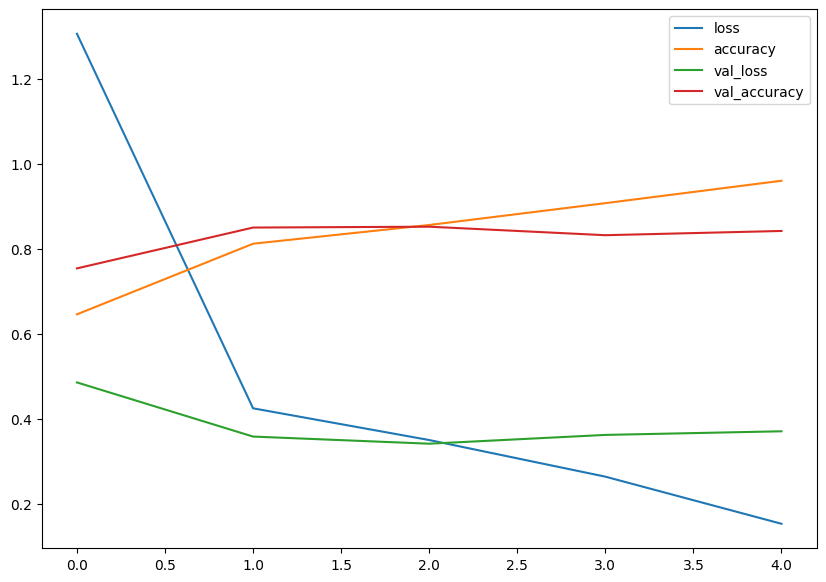

In [28]:
# evaluate the model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

it seems overfitting

In [29]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

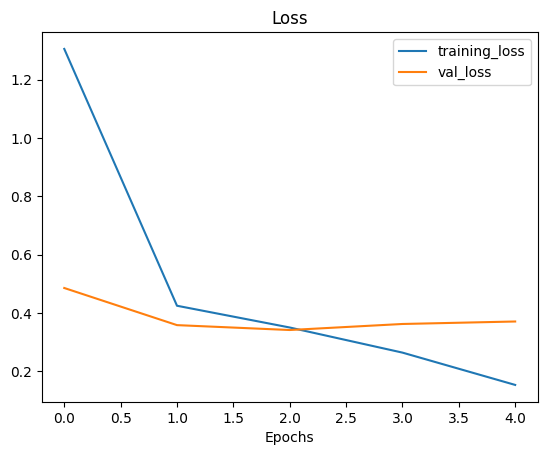

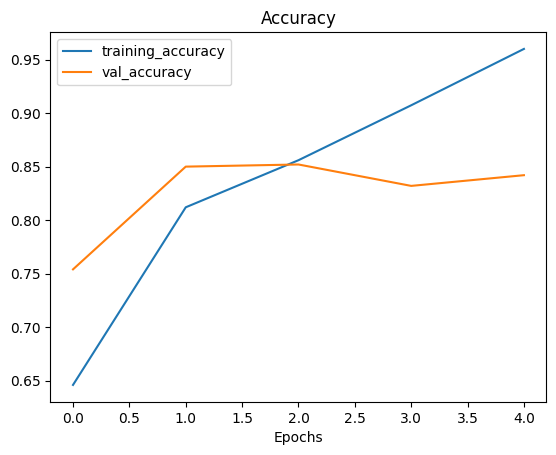

In [30]:


# Check out the loss curves of model_4
plot_loss_curves(history_4)



In [31]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Create another model to reduse the overfitting(ConvNet with Maxpooling)

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')

])

In [33]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [34]:
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 13s 235ms/step - loss: 0.6508 - accuracy: 0.6047 - val_loss: 0.5695 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5249 - accuracy: 0.7547 - val_loss: 0.4383 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4322 - accuracy: 0.8113 - val_loss: 0.3720 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4031 - accuracy: 0.8267 - val_loss: 0.3512 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 10s 224ms/step - loss: 0.3839 - accuracy: 0.8293 - val_loss: 0.3392 - val_accuracy: 0.8360


<Axes: >

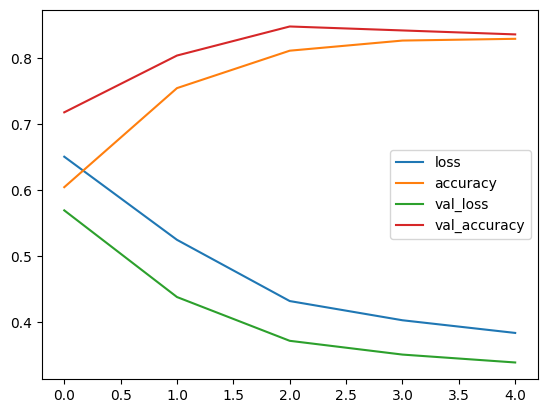

In [35]:
import pandas as pd
pd.DataFrame(history_5.history).plot()

In [36]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

To implement Data Augmentation

In [38]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [39]:
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print('Non-Augmented training Data')
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
print('Unchanged test data')
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training Data
Found 1500 images belonging to 2 classes.
Unchanged test data
Found 500 images belonging to 2 classes.


In [40]:
images, labels=train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Text(0.5, 1.0, 'Orginal')

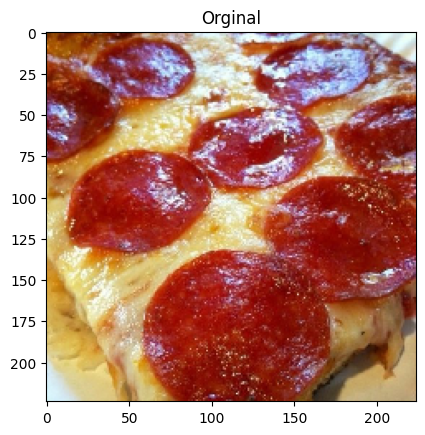

In [43]:
# show orginal and augmented image
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f'Orginal')

(-0.5, 223.5, 223.5, -0.5)

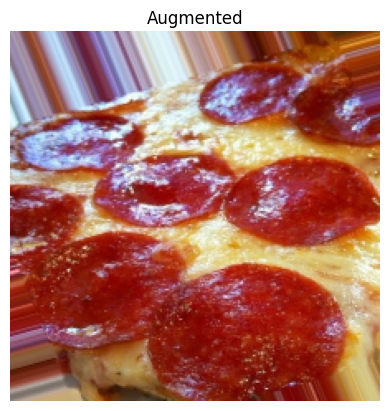

In [44]:
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented')
plt.axis(False)

In [46]:
 # Create a model same as model_5
 model_6=Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
 ])

In [47]:
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [48]:
history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 28s 546ms/step - loss: 0.7329 - accuracy: 0.5067 - val_loss: 0.6734 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 27s 567ms/step - loss: 0.6894 - accuracy: 0.5193 - val_loss: 0.6506 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6814 - accuracy: 0.5973 - val_loss: 0.6169 - val_accuracy: 0.7040
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6672 - accuracy: 0.6460 - val_loss: 0.5983 - val_accuracy: 0.6720
Epoch 5/5
47/47 [==============================] - 26s 554ms/step - loss: 0.6396 - accuracy: 0.6493 - val_loss: 0.5865 - val_accuracy: 0.6540


In [50]:
model_6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)      

<Axes: >

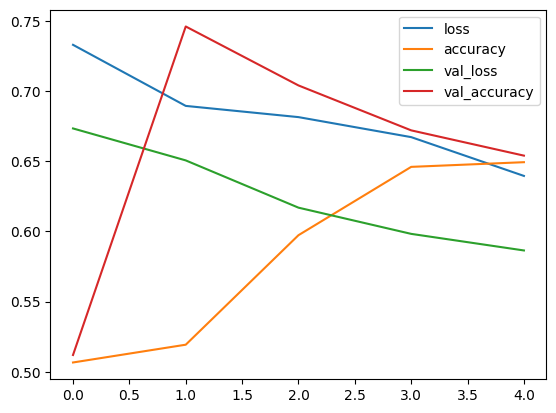

In [51]:
import pandas as pd
pd.DataFrame(history_6.history).plot()

It's not perfect :-( . let's do shuffle the train dataset

In [52]:
#doing shuffle
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [53]:
# Create a model with suffled dataset
model_7=Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [54]:
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [55]:
history_7  = model_7.fit(
    train_data_augmented_shuffle,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffle),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 27s 535ms/step - loss: 0.6425 - accuracy: 0.6160 - val_loss: 0.4780 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5119 - accuracy: 0.7473 - val_loss: 0.3689 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.4911 - accuracy: 0.7693 - val_loss: 0.3648 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.4925 - accuracy: 0.7680 - val_loss: 0.4262 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 25s 538ms/step - loss: 0.4780 - accuracy: 0.7853 - val_loss: 0.3283 - val_accuracy: 0.8700


In [56]:
model_7.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

<Axes: >

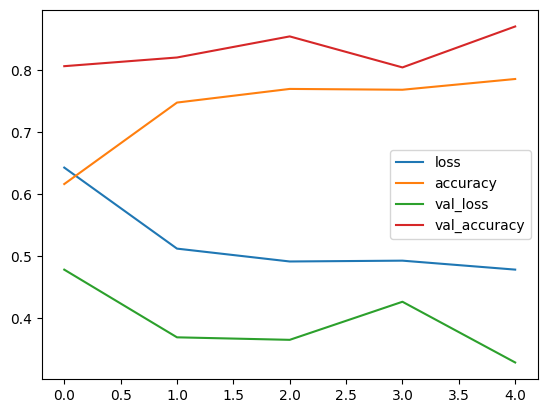

In [57]:
import pandas as pd
pd.DataFrame(history_7.history).plot()

In [61]:
loss,accuracy=model_7.evaluate(test_data)

16/16 [==============================] - 2s 145ms/step - loss: 0.3283 - accuracy: 0.8700
